# Data X checks

### Apr 19, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


# Get data

In [3]:
file_list=[]#Define an empty list
for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/sim_SourceSearch/A2/Joined"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        file_list.append(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/sim_SourceSearch/A2/Joined", str(filename))) #add file name to the list
        

In [5]:
chain = TChain("OutputTree_recoRadius_19") #Define chain and tree that needs to be read. "RecoVals" in this case.
for line in file_list:
    chain.AddFile(line)

In [6]:
phi = []
theta = []
phi_h = []
theta_h = []
viewAnglAvg = []
corr_value = []
weights = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    phi.append(entry.peakPhi_single[0]) 
#     phi_h.append(entry.peakPhi_single[1]) 
    theta.append(entry.peakTheta_single[0])
#     theta_h.append(entry.peakTheta_single[1])
#     viewAnglAvg.append(entry.viewAngleAvg[0])
    corr_value.append(entry.peakCorr_single[0])
    weights.append(entry.weight)

# Look at distributions

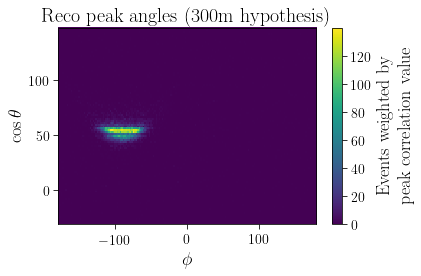

In [35]:
plt.hist2d(phi,np.array(theta)+58, bins=[180,100], weights=weights);
plt.colorbar(label="Events weighted by \n peak correlation value")
# plt.scatter(np.degrees(1.571)-180,180-np.degrees(2.32)-58, color="red")
plt.xlabel("$\phi$")
plt.ylabel("$\cos\\theta$")
plt.title("Reco peak angles (300m hypothesis)")
plt.tight_layout()

In [36]:
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

x=phi
y=np.cos(np.radians(np.array(theta)+58))
# y = theta
xy = np.vstack([x,y])
kernel = gaussian_kde(xy, bw_method='silverman')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

In [41]:
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

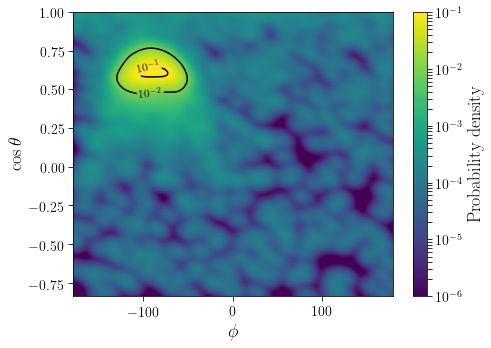

In [48]:
plt.figure(figsize=(7,5))
from matplotlib import ticker, cm

levels = [1e-2,1e-1]

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=1e-1))

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# plt.title("Hpol")
plt.xlabel("$\phi$")
plt.ylabel("$\cos\\theta$")
plt.tight_layout()
# plt.savefig("KDE_CenA_recoPeak_300m_hpol.pdf", dpi=300)